In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from  matplotlib.patches import Polygon
from IPython.display import Image
import imageio.v2
import csv

import tqdm as tqdm
import jax 
# jax.config.update('jax_platform_name', 'cpu')
# jax.config.update("jax_debug_nans", False)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

from iLQR import iLQR, Path



In [3]:
def load_path(filepath: str):
    """
    Gets the centerline of the track from the trajectory data. We currently only
    support 2D track.

    Args:
        filepath (str): the path to file consisting of the centerline position.

    Returns:
        np.ndarray: centerline, of the shape (2, N).
    """
    x = []
    y = []
    with open(filepath) as f:
        spamreader = csv.reader(f, delimiter=',')
        for i, row in enumerate(spamreader):
            if i > 0:
                x.append(float(row[0]))
                y.append(float(row[1]))

    return np.array([x, y])

In [4]:

centerline = load_path('outerloop_center_smooth.csv')
path = Path(centerline, 0.6, 0.6, loop=True)
config_file = '/hdd/Git_Repo/PrincetonRaceCar/ROS_Core/src/Planning/ilqr_planning_ros/configs/ilqr.yaml'
solver = iLQR()#config_file)
# # make some obstacles
# obs1 = np.array([[-1, -1, -0, -0], [5.2, 6.0, 6.0, 5.2]]).T
obs1 = np.array([[-1, -1, -0.5, -0.5], [5.2, 5.9, 5.9, 5.2]]).T
obs2 = np.array([[1, 1, 1.5, 1.5], [-0.2, 0.5, 0.5, -0.2]]).T
obs_list = [[obs1 for _ in range(10)]]#, [obs2 for _ in range(10)]]
solver.update_obstacles(obs_list)
solver.update_path(path)

iLQR setting: iLQR config: {'num_dim_x': 5, 'num_dim_u': 2, 'n': 10, 'dt': 0.1, 'platform': 'cpu', 'max_iter': 50, 'tol': 0.05, 'line_search_base': 0.1, 'line_search_a': -1, 'line_search_b': 3, 'line_search_c': 1, 'reg_min': 1e-05, 'reg_max': 100000000.0, 'reg_scale_down': 5, 'reg_scale_up': 5, 'reg_init': 1.0, 'max_attempt': 5, 'wheelbase': 0.257, 'radius': 0.13, 'width': 0.22, 'length': 0.4, 'delta_max': 0.35, 'delta_min': -0.35, 'v_max': 5.0, 'v_min': 0.0, 'omega_min': -6.0, 'omega_max': 6.0, 'a_max': 5.0, 'a_min': -5.0, 'dim_closest_pt_x': 0, 'dim_closest_pt_y': 1, 'dim_path_slope': 2, 'path_cost_type': 'quadratic', 'path_weight': 1.0, 'path_huber_delta': 2, 'dim_vel_ref': 3, 'vel_cost_type': 'quadratic', 'vel_weight': 2.0, 'vel_huber_delta': 1, 'lat_accel_thres': 6.0, 'lat_accel_a': 5.0, 'lat_accel_b': 2.0, 'dim_progress': 4, 'progress_weight': 1.0, 'dim_right_boundary': 5, 'dim_left_boundary': 6, 'lane_boundary_a': 100.0, 'lane_boundary_b': 1.0, 'ctrl_cost_type': 'quadratic', 'ct

Update from  291.6296  to  154.66444 reg:  15625.0 alpha: 10.000 0.008
Update from  154.66444  to  108.88998 reg:  78125.0 alpha: 10.000 0.010
Update from  108.88998  to  91.12693 reg:  15625.0 alpha: 10.000 0.013
Update from  91.12693  to  85.78499 reg:  3125.0 alpha: 1.000 0.015
Update from  85.78499  to  67.65109 reg:  625.0 alpha: 1.000 0.018
Update from  67.65109  to  61.57847 reg:  625.0 alpha: 1.000 0.020
Update from  61.57847  to  58.603714 reg:  625.0 alpha: 1.000 0.022
Update from  58.603714  to  56.79452 reg:  625.0 alpha: 1.000 0.025
Update from  56.79452  to  55.861717 reg:  625.0 alpha: 1.000 0.028
Update from  55.861717  to  53.094135 reg:  625.0 alpha: 10.000 0.029
Update from  53.094135  to  51.414703 reg:  625.0 alpha: 1.000 0.031
Update from  51.414703  to  51.405125 reg:  625.0 alpha: 1.000 0.033
Exit after 11 iterations with runtime 0.033136844635009766 with status Converged. Set uo takes 0.006737232208251953 s. Total 12 cost derivative with average time of 0.00020

Text(0.5, 1.0, 'Lateral Acceleration')

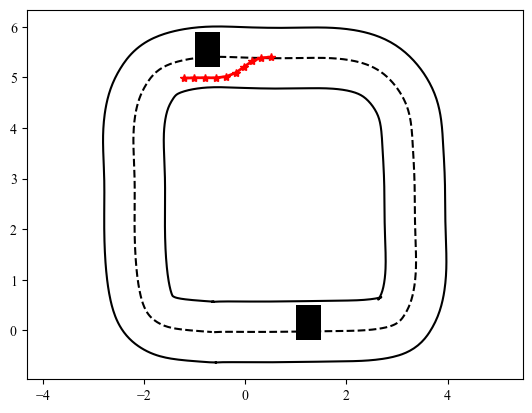

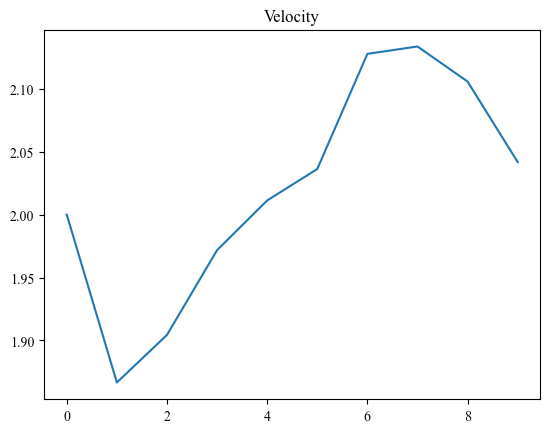

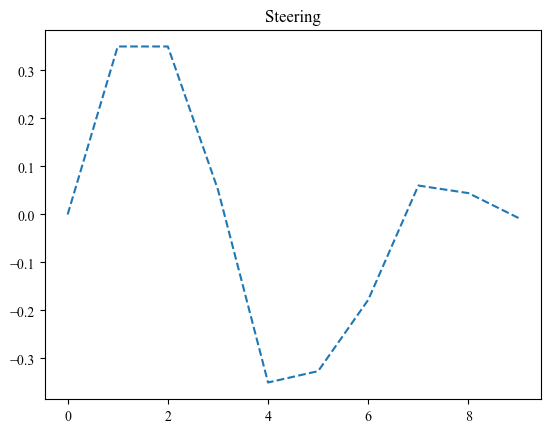

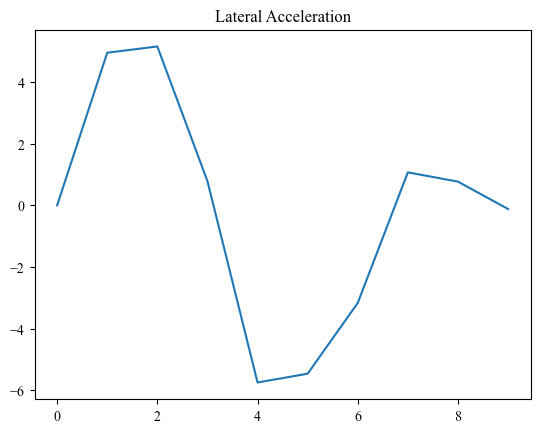

In [5]:
# solver.update_obstacles(obs_list)

x_cur = np.array([0.5, 5.4, 2, 3.14, 0])
plan = solver.plan(x_cur, verbose=True)

path.plot_track()
path.plot_track_center()
plt.plot(plan['states'][0, :], plan['states'][1, :], 'r-*', linewidth=2)

p = Polygon(obs1, facecolor = 'k')
plt.gca().add_patch(p)
plt.axis('equal')

p = Polygon(obs2, facecolor = 'k')
plt.gca().add_patch(p)
plt.axis('equal')

plt.figure()
a = plan['states'][2, :] 
plt.plot(a)
plt.title('Velocity')

plt.figure()
# plt.plot(plan['controls'][0,:])
plt.plot(plan['states'][-1,:], '--')
plt.title('Steering')

plt.figure()
a = plan['states'][2, :]**2 / 0.257 * np.tan(plan['states'][-1, :])
plt.plot(a)
plt.title('Lateral Acceleration')



iLQR setting: iLQR config: {'num_dim_x': 5, 'num_dim_u': 2, 'n': 10, 'dt': 0.1, 'platform': 'cpu', 'max_iter': 50, 'tol': 0.05, 'line_search_base': 0.1, 'line_search_a': -1, 'line_search_b': 3, 'line_search_c': 1, 'reg_min': 1e-05, 'reg_max': 100000000.0, 'reg_scale_down': 5, 'reg_scale_up': 5, 'reg_init': 1.0, 'max_attempt': 5, 'wheelbase': 0.257, 'radius': 0.13, 'width': 0.22, 'length': 0.4, 'delta_max': 0.35, 'delta_min': -0.35, 'v_max': 5.0, 'v_min': 0.0, 'omega_min': -6.0, 'omega_max': 6.0, 'a_max': 5.0, 'a_min': -5.0, 'dim_closest_pt_x': 0, 'dim_closest_pt_y': 1, 'dim_path_slope': 2, 'path_cost_type': 'quadratic', 'path_weight': 1.0, 'path_huber_delta': 2, 'dim_vel_ref': 3, 'vel_cost_type': 'quadratic', 'vel_weight': 2.0, 'vel_huber_delta': 1, 'lat_accel_thres': 6.0, 'lat_accel_a': 5.0, 'lat_accel_b': 2.0, 'dim_progress': 4, 'progress_weight': 1.0, 'dim_right_boundary': 5, 'dim_left_boundary': 6, 'lane_boundary_a': 100.0, 'lane_boundary_b': 1.0, 'ctrl_cost_type': 'quadratic', 'ct

iLQR takes : 0.01 sec']: 100%|██████████| 100/100 [00:18<00:00,  5.33it/s]
/tmp/ipykernel_23011/645346105.py:74: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


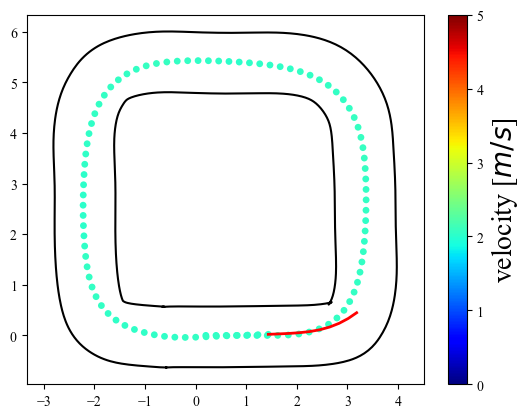

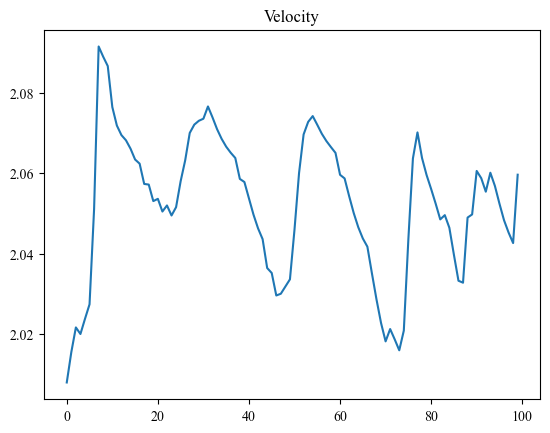

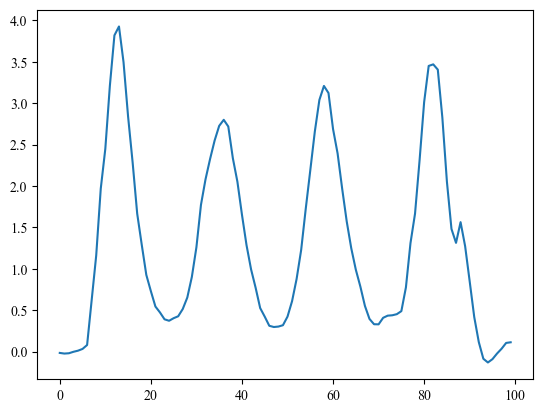

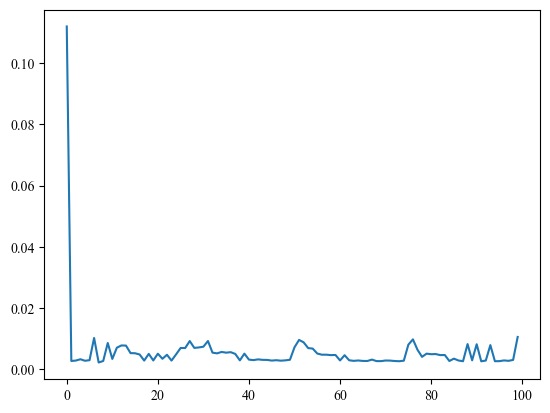

In [6]:
x_cur = np.array([0., 0., 2., 0., 0.])  # Initial state.

# Load ILQR
centerline = load_path('outerloop_center_smooth.csv')
path = Path(centerline, 0.6, 0.6, loop=True)

config_file = '/hdd/Git_Repo/PrincetonRaceCar/ROS_Core/src/Planning/ilqr_planning_ros/configs/ilqr.yaml'
solver = iLQR() #(config_file)
solver.update_path(path)

obs1 = np.array([[-1, -1, -0.5, -0.5], [5.3, 5.8, 5.8, 5.3]]).T
obs2 = np.array([[1, 1.25, 1.5, 1.5, 1.25, 1], [5.8, 5.4, 5.8 , 6.0, 6.2, 6.0]]).T
obs3 = np.array([[2.5, 2.5, 2, 2], [-0, 0.5, 0.5, -0]]).T
# obs4 = np.array([[-200, -200, -1.5, -1.5], [0.5, 1, 1, 0.5]]).T
obs_list = [[obs1 for _ in range(10)], 
            # [obs2 for _ in range(10)],
            [obs3 for _ in range(10)]]
            # [obs4 for _ in range(10)]]
# solver.update_obstacles(obs_list)
solver.update_obstacles([])

# define some parameters
n = 10
itr_receding = 100
init_control = np.zeros((2, n))
fig_prog_folder = 'fig/'
! mkdir -p $fig_prog_folder

state_history = np.zeros((5,itr_receding))
t_process = np.zeros(itr_receding)
for i in (pbar := tqdm.tqdm(range(itr_receding))):
    
    plan = solver.plan(x_cur, init_control)
    states = plan['states']
    controls = plan['controls']
    x_cur = states[:,1]
    state_history[:,i]  = x_cur
    init_control[:,:-1] = controls[:,1:]
    pbar.set_description(f"iLQR takes : {plan['t_process']:.2f} sec']")
    t_process[i] = plan['t_process']
    # plot
    plt.clf()
    path.plot_track()
    
    # p = Polygon(obs1, facecolor = 'k')
    # plt.gca().add_patch(p)

    # p = Polygon(obs2, facecolor = 'k')
    # plt.gca().add_patch(p)

    # p = Polygon(obs3, facecolor = 'k')
    # plt.gca().add_patch(p)

    # p = Polygon(obs4, facecolor = 'k')
    # plt.gca().add_patch(p)
    
    sc = plt.scatter(
        state_history[0, :i], state_history[1, :i], s=24,
        c=state_history[2, :i], cmap=cm.jet, vmin=0, vmax=5,
        edgecolor='none', marker='o'
    )
    cbar = plt.colorbar(sc)
    cbar.set_label(r"velocity [$m/s$]", size=20)
    
    plt.plot(states[0, :], states[1, :], 'r', linewidth=2)
    plt.axis('equal')
    plt.savefig(os.path.join(fig_prog_folder, str(i)+".png"), dpi=200)
plt.close('All')

gif_path = os.path.join(fig_prog_folder, 'rollout.gif')
with imageio.get_writer(gif_path, mode='I') as writer:
    for i in range(itr_receding):
        filename = os.path.join(fig_prog_folder, str(i)+".png")
        image = imageio.imread(filename)
        writer.append_data(image)

plt.figure()
plt.plot(state_history[2,:])
plt.title('Velocity')


plt.figure()
a = state_history[2, :]**2 / 0.257 * np.tan(state_history[-1, :])
plt.plot(a)

plt.figure()
plt.plot(t_process)



In [ ]:
a = np.random.randn(2,20)
b = np.zeros_like(a)

i=7
b[:,:(20-i)] = a[:,i:]
b